In [54]:
# Q1
install.packages('stringr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [55]:
library('stringr')

In [57]:
# Q2

pairs = read.csv(url("https://raw.githubusercontent.com/philipperemy/FX-1-Minute-Data/master/pairs.csv"))

#or 

#pairs<-read.csv("/Users/soumyasharma/Desktop/pairs.csv")
pairs

currency_pair_name,currency_pair_code,history_first_trading_month
<chr>,<chr>,<int>
EUR/USD,eurusd,200005
EUR/CHF,eurchf,200203
EUR/GBP,eurgbp,200203
EUR/JPY,eurjpy,200203
EUR/AUD,euraud,200208
USD/CAD,usdcad,200006
USD/CHF,usdchf,200005
USD/JPY,usdjpy,200005
USD/MXN,usdmxn,201011


In [58]:
library('dplyr')

In [63]:
#3
curr_split = function(df){ 
  name = df[[1]] 
  str = str_split(name, "/") 
  curr = str[[1]]
  return(curr)
}

currency_pair_name = pairs[1]
curr_split(currency_pair_name)[1]

[1] "EUR"

In [76]:
# 4
curr = apply(currency_pair_name, 1, split_cur)
foreign_ccy = curr[1,]
foreign_ccy

[1] "EUR" "EUR" "EUR" "EUR" "EUR" "USD" "USD" "USD" "USD" "GBP" "GBP" "GBP"
[13] "AUD" "AUD" "CHF" "NZD" "NZD" "XAU" "EUR" "AUD" "CAD" "EUR" "GRX" "NZD"
[25] "SGD" "USD" "USD" "USD" "XAU" "AUD" "AUX" "EUR" "EUR" "FRX" "HKX" "NZD"
[37] "SPX" "USD" "USD" "USD" "XAU" "ZAR" "BCO" "ETX" "EUR" "EUR" "GBP" "GBP"
[49] "JPX" "UDX" "USD" "USD" "WTI" "XAU" "AUD" "CAD" "EUR" "EUR" "EUR" "GBP"
[61] "NSX" "UKX" "USD" "USD" "XAG" "XAU"

In [77]:
# 5
pairs$foreign_ccy = fc
pairs$domestic_ccy = dc
head(pairs)

,currency_pair_name,currency_pair_code,history_first_trading_month,foreign_ccy,domestic_ccy
,<chr>,<chr>,<int>,<chr>,<chr>
1,EUR/USD,eurusd,200005,EUR,USD
2,EUR/CHF,eurchf,200203,EUR,CHF
3,EUR/GBP,eurgbp,200203,EUR,GBP
4,EUR/JPY,eurjpy,200203,EUR,JPY
5,EUR/AUD,euraud,200208,EUR,AUD
6,USD/CAD,usdcad,200006,USD,CAD


In [78]:
pairs_usd = filter(select(pairs, foreign_ccy, domestic_ccy), domestic_ccy == "USD")
head(pairs_usd)

,foreign_ccy,domestic_ccy
,<chr>,<chr>
1,EUR,USD
2,GBP,USD
3,AUD,USD
4,NZD,USD
5,XAU,USD
6,SPX,USD


In [83]:
#7
domestic_count = select(pairs, domestic_ccy)
domestic_count = domestic_count %>% group_by(domestic_ccy) %>% summarize(count=n())
domestic_count = rename(domestic_count, n = count)

head(domestic_count)

domestic_ccy,n
<chr>,<int>
AUD,4
CAD,5
CHF,7
CZK,2
DKK,2
EUR,4


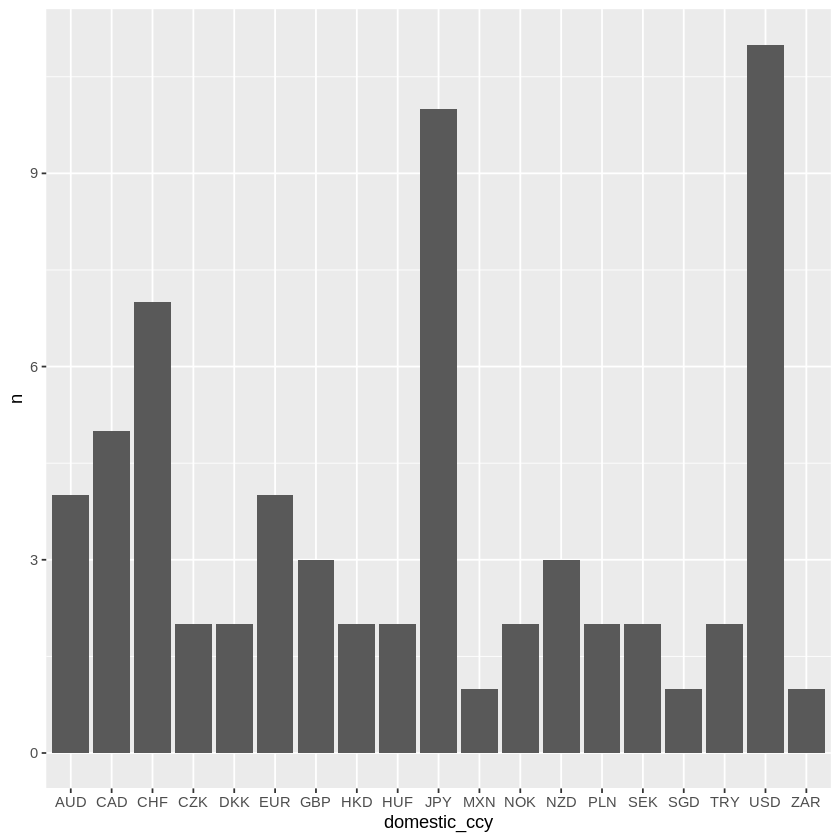

In [85]:
#8
library(tidyverse)
ggplot(domestic_count, aes(x=domestic_ccy, y=n)) + geom_bar(stat="identity")

In [95]:
#9
domestic_count_oldnew = select(pairs, domestic_ccy, history_first_trading_month)

domestic_count_oldnew$oldnew = "old"
domestic_count_oldnew$oldnew[domestic_count_oldnew$history_first_trading_month>201001] = "new"

domestic_count_oldnew = select(domestic_count_oldnew, domestic_ccy, oldnew)
domestic_count_oldnew = domestic_count_oldnew %>% group_by(domestic_ccy, oldnew) %>% summarize(count=n())
domestic_count_oldnew = rename(domestic_count_oldnew, n=count)
head(domestic_count_oldnew)

`summarise()` has grouped output by 'domestic_ccy'. You can override using the
`.groups` argument.


domestic_ccy,oldnew,n
<chr>,<chr>,<int>
AUD,new,1
AUD,old,3
CAD,old,5
CHF,old,7
CZK,new,2
DKK,old,2


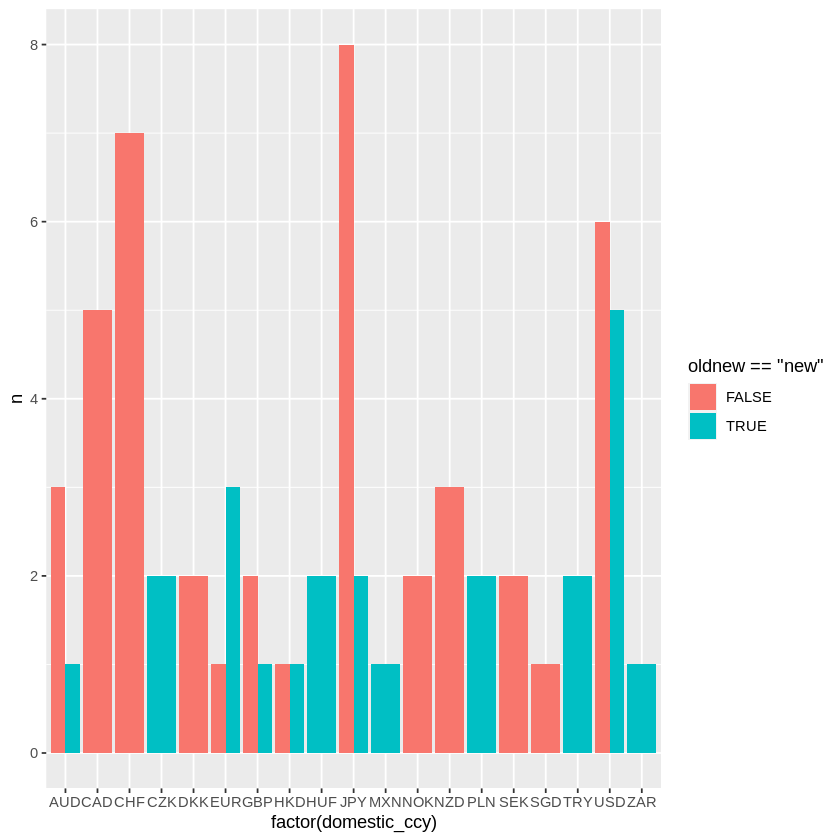

In [98]:
#10
ggplot(domestic_count_oldnew, aes(fill=oldnew=="new", y=n, x=factor(domestic_ccy))) +
geom_bar(position="dodge", stat="identity")

In [99]:
install.packages('sparklyr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Q11
library(sparklyr)
library(ggraph)
library(igraph)
library(graphframes)
sc=spark_connect(master="local")
pairs_tbl = copy_to(sc, pairs, "pairs", overwrite = TRUE)
pairs_tbl

In [ ]:
# Q12
exchangeable = pairs_tbl %>% select(foreign_ccy, domestic_ccy)
exchangeable = exchangeable %>% rename(src = foreign_ccy, dst = domestic_ccy)
exchangeable